# Data analysis and visualization: English Premier League & UEFA Champions League Winner  2018-19

* **Physical attribute**: Comparing the stamina of both the teams with various paramters like BMI, Overall to ascertain the readiness of the players for a long season. 
* **Cost effectiveness** Comparing the Wages for the players to assess how much money was spent in wages to acheive the results.
* **Home talent** Ratio of home and foreign players in the respective team to assess how much importance do the club give to groom players for national team
* **Playing Attribute** Positioning and composure of the players from both the teams.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the data from current working directory
df= pd.read_csv("Data.csv")

In [3]:
df.head(3)

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M


In [4]:
#Checking the number of rows and columns in the dataframe
df.shape

(18207, 89)

## Selecting only Liverpool and Man City player from the whole dataframe

In [5]:

df= df[(df['Club']== 'Liverpool') |(df['Club']== 'Manchester City')]

In [6]:
#Modifying name for convinience
df['Club'].replace('Manchester City','Man City',inplace=True)

In [7]:
#Checking the columns names in dataframe to determine which columns will be required to achieve the objective of the project
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

## Removing unnecessary columns and trimming the dataset

In [8]:
df.drop(['Unnamed: 0', 'ID','Flag','Club Logo','Photo','Special','Body Type','Real Face','Jersey Number','Joined', 'Loaned From','Contract Valid Until','LS', 'ST', 'RS', 'LW','LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM','RCM','RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB','Release Clause','Potential','Skill Moves','Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling','Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration','SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
'Jumping', 'LongShots', 'Aggression','Interceptions','Vision', 'Work Rate','Penalties','Marking', 'StandingTackle', 'SlidingTackle','Preferred Foot','GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],axis=1,inplace =True)
df.head(5)

,Name,Age,Nationality,Overall,Club,Value,Wage,International Reputation,Weak Foot,Position,Height,Weight,Stamina,Strength,Positioning,Composure
4,K. De Bruyne,27,Belgium,91,Man City,€102M,€355K,4.0,5.0,RCM,5'11,154lbs,90.0,75.0,87.0,88.0
13,David Silva,32,Spain,90,Man City,€60M,€285K,4.0,2.0,LCM,5'8,148lbs,78.0,52.0,89.0,93.0
23,S. Agüero,30,Argentina,89,Man City,€64.5M,€300K,4.0,4.0,ST,5'8,154lbs,76.0,73.0,92.0,90.0
26,M. Salah,26,Egypt,88,Liverpool,€69.5M,€255K,3.0,3.0,RM,5'9,157lbs,84.0,70.0,90.0,91.0
55,L. Sané,22,Germany,86,Man City,€61M,€195K,2.0,3.0,LW,6'0,165lbs,79.0,70.0,84.0,78.0


In [9]:
#checking rows and columns after dropping a few columns
df.shape

(66, 16)

# Feature Engineering

## Checking the types of position

In [10]:
df['Position'].unique()

array(['RCM', 'LCM', 'ST', 'RM', 'LW', 'RW', 'GK', 'LM', 'LCB', 'CAM',
       'CDM', 'CB', 'RB', 'CM', 'RCB', 'LB'], dtype=object)

In [11]:
#Grouping players collectively into three position
df['Position'].replace(['RCM','LCM','RM','LW','RW','LM','CAM','CDM','CM'],'Midfielder',inplace=True)
df['Position'].replace(['CB','RB','RCB','LB','LCB','GK'],'Defender',inplace=True) # Clubbing GK along with defenders
df['Position'].replace('ST','Striker',inplace=True)


In [12]:
df['Position'].unique() #cross-checking 

array(['Midfielder', 'Striker', 'Defender'], dtype=object)

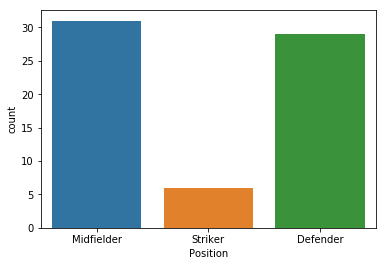

In [13]:
# countplot for number of players by position
sns.countplot(x='Position',data=df)

### Modifying wage and weight columns 


### Checking data type before initiating modification of the columns


In [14]:
df.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Club                         object
Value                        object
Wage                         object
International Reputation    float64
Weak Foot                   float64
Position                     object
Height                       object
Weight                       object
Stamina                     float64
Strength                    float64
Positioning                 float64
Composure                   float64
dtype: object

### Height and Weight are of object type which is in accordance to our requirement for now so as to perform string operation 

In [15]:
df['Wage'] =df['Wage'].apply(lambda x: x.strip('€'))
df['Wage']= df['Wage'].apply(lambda x: x.replace('K', '000'))
df.rename(columns={'Wage' :'Wage_Euro'}, inplace= True)
df['Wage_Euro'] = df.Wage_Euro.astype(float)

df['Weight'] =df['Weight'].apply(lambda x: x.strip('lbs'))
df.rename(columns={'Weight' :'Weight_lbs' }, inplace= True)

#Changing from object to float type
df['Weight_lbs'] = df.Weight_lbs.astype(float)    


#pounds to kg
df['Weight_kg'] = df['Weight_lbs'].apply(lambda x: x*0.453592)  
df.drop(['Weight_lbs'], axis = 1, inplace= True)

df.head(3)

,Name,Age,Nationality,Overall,Club,Value,Wage_Euro,International Reputation,Weak Foot,Position,Height,Stamina,Strength,Positioning,Composure,Weight_kg
4,K. De Bruyne,27,Belgium,91,Man City,€102M,355000.0,4.0,5.0,Midfielder,5'11,90.0,75.0,87.0,88.0,69.853168
13,David Silva,32,Spain,90,Man City,€60M,285000.0,4.0,2.0,Midfielder,5'8,78.0,52.0,89.0,93.0,67.131616
23,S. Agüero,30,Argentina,89,Man City,€64.5M,300000.0,4.0,4.0,Striker,5'8,76.0,73.0,92.0,90.0,69.853168


## Converting unit of Height from feet-inches to metres  for BMI calculation

In [16]:

df[['Feet','Inch']] = df.Height.str.split("'",expand=True,) 
df.head(3)
df['Inch'] = df.Inch.astype(float)
df['Feet'] = df.Feet.astype(float)

#feet to inches
df['Feet'] = df['Feet'].apply(lambda x: x*12) 

#adding the columns whose values are in inches
df['Height_inches']=df['Feet'] + df['Inch']

# inches to metres
df['Height_metres'] = df['Height_inches'].apply(lambda x: x*0.0254) 

In [17]:
df.dtypes

Name                         object
Age                           int64
Nationality                  object
Overall                       int64
Club                         object
Value                        object
Wage_Euro                   float64
International Reputation    float64
Weak Foot                   float64
Position                     object
Height                       object
Stamina                     float64
Strength                    float64
Positioning                 float64
Composure                   float64
Weight_kg                   float64
Feet                        float64
Inch                        float64
Height_inches               float64
Height_metres               float64
dtype: object

### Dropping Feet, Inches, Height_inches since Height_metres have been created

In [18]:
df.drop(['Feet', 'Inch','Height_inches','Height'], axis = 1, inplace= True)

### Calculating BMI

In [19]:
df['BMI']=df['Weight_kg']/ (df['Height_metres'] * df['Height_metres'])
df.head()

,Name,Age,Nationality,Overall,Club,Value,Wage_Euro,International Reputation,Weak Foot,Position,Stamina,Strength,Positioning,Composure,Weight_kg,Height_metres,BMI
4,K. De Bruyne,27,Belgium,91,Man City,€102M,355000.0,4.0,5.0,Midfielder,90.0,75.0,87.0,88.0,69.853168,1.8034,21.478402
13,David Silva,32,Spain,90,Man City,€60M,285000.0,4.0,2.0,Midfielder,78.0,52.0,89.0,93.0,67.131616,1.7272,22.503074
23,S. Agüero,30,Argentina,89,Man City,€64.5M,300000.0,4.0,4.0,Striker,76.0,73.0,92.0,90.0,69.853168,1.7272,23.415360
26,M. Salah,26,Egypt,88,Liverpool,€69.5M,255000.0,3.0,3.0,Midfielder,84.0,70.0,90.0,91.0,71.213944,1.7526,23.184590
55,L. Sané,22,Germany,86,Man City,€61M,195000.0,2.0,3.0,Midfielder,79.0,70.0,84.0,78.0,74.842680,1.8288,22.377775


# Dataframe is ready for further visualization and Analysis in accordance to the objective of the project

### Distribution of player by position for Man City and Liverpool


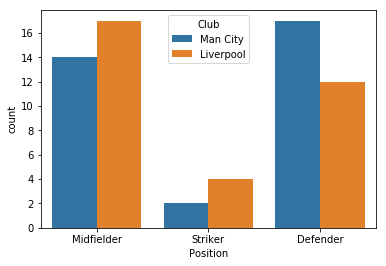

In [20]:
sns.countplot(x='Position',data=df,hue='Club')

# PHYSICAL ATTRIBUTE

## Plotting the stamina distplot 

C:\Users\Barun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


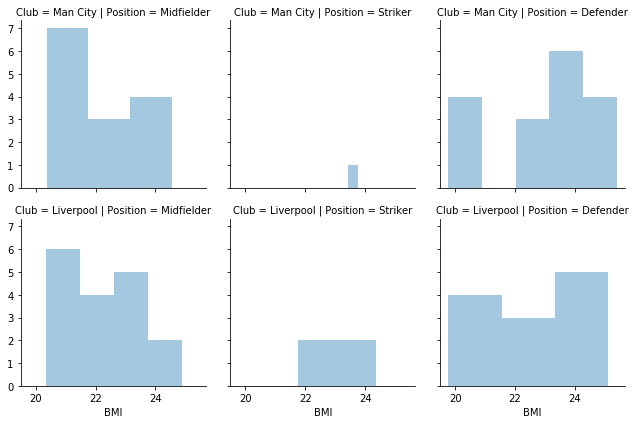

In [21]:
g=sns.FacetGrid(data=df,col='Position',row='Club')
g.map(sns.distplot,'BMI',kde=False)

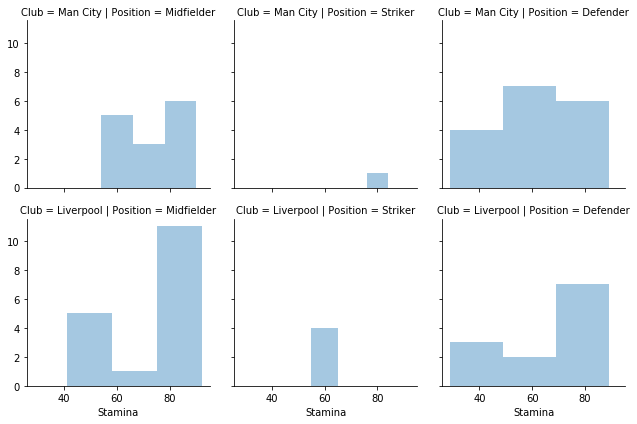

In [22]:
g=sns.FacetGrid(data=df,col='Position',row='Club')
g.map(sns.distplot,'Stamina',kde=False)

## Plotting the stamina vs BMI 

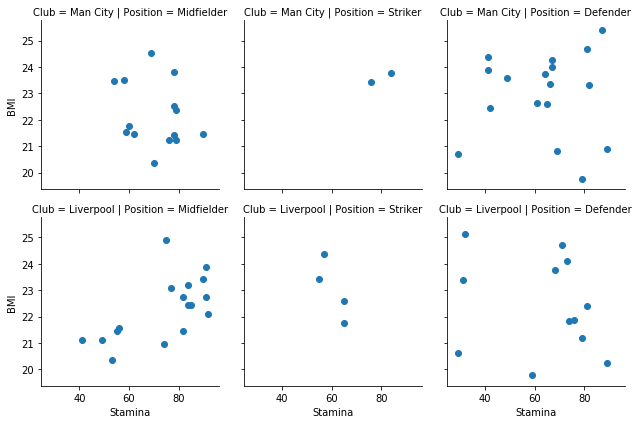

In [23]:
g=sns.FacetGrid(data=df,col='Position',row='Club')
g.map(plt.scatter,'Stamina','BMI')

## Conclusion : Physical Attribute
#### BMI of almost all the players from  both the team is  in the healthy range of 18-25. It can be infered that players from both the teams have maintained their weight in accordance to their height.
#### Stamina vs BMI  is too scattered to draw any sort of inference. 

# COST EFFECTIVENESS

## Total money spent by both the clubs in wages

In [24]:
df.groupby('Club')['Wage_Euro'].sum()


Club
Liverpool    2902000.0
Man City     3741000.0
Name: Wage_Euro, dtype: float64

## Plotting boxplot to look at the wage distribution: Median, Max, Min and outlier if any

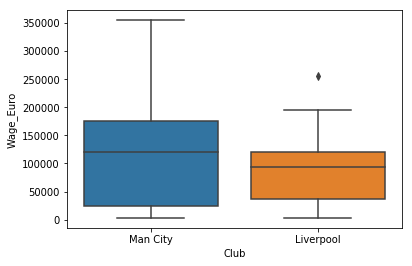

In [25]:
sns.boxplot(x='Club', y= 'Wage_Euro',data=df)

## Barplot to look at  the mean of the wages

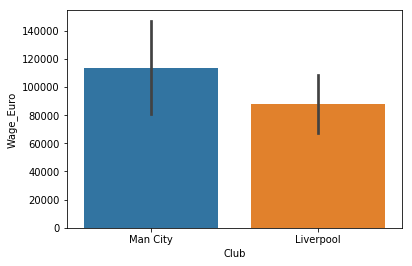

In [26]:
sns.barplot(x='Club',y='Wage_Euro',data=df)

## Barplot to look at standard deviation in wage

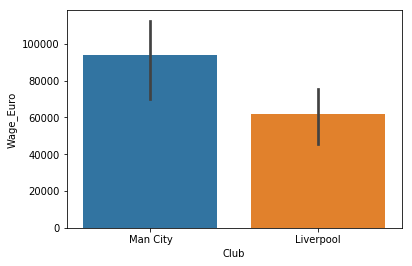

In [27]:
sns.barplot(x='Club',y='Wage_Euro',data=df,estimator=np.std)

## Regression line: Overall Vs Wage

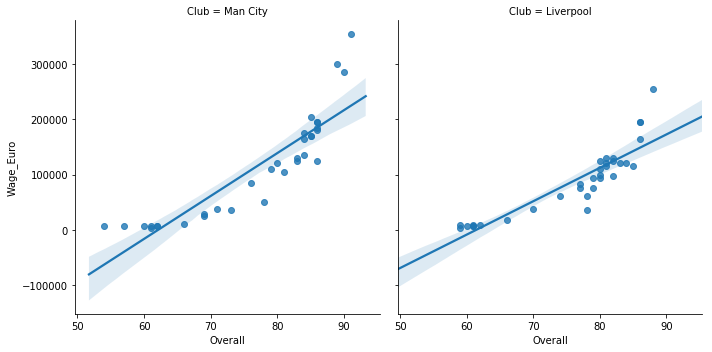

In [28]:
sns.lmplot(x='Overall',y='Wage_Euro',data=df,col='Club')

## Conclusion : Cost effectiveness
#### Man City and Liverpool finished very close in the points table with Man City winning the English Premier League with one point difference. Liverpool not only finished second in the league but went on to win the Champions League. 
#### Looking at the wage distribution in terms of mean, median, max, standard deviation along with total money spent it is quite clear that Man City have invested far more money than Liverpool. Man CIty winning the league justifies the money they have spent but on a larger scale it does not seems to be cost effective.

# HOME TALENT PROMOTION

In [29]:
df.groupby('Club')['Nationality'].value_counts()

Club       Nationality
Liverpool  England        13
           Brazil          3
           Netherlands     3
           Belgium         2
           Spain           2
           Cameroon        1
           Croatia         1
           Egypt           1
           Guinea          1
           Poland          1
           Portugal        1
           Scotland        1
           Senegal         1
           Serbia          1
           Switzerland     1
Man City   England         9
           Brazil          4
           France          4
           Argentina       3
           Spain           3
           Belgium         2
           Germany         2
           Algeria         1
           Chile           1
           Montenegro      1
           Netherlands     1
           Portugal        1
           Ukraine         1
Name: Nationality, dtype: int64

In [30]:
t=df[df['Nationality']=='England']
p=df[df['Nationality']!='England']

In [31]:
T=t.groupby('Club')['Nationality'].value_counts()
T

Club       Nationality
Liverpool  England        13
Man City   England         9
Name: Nationality, dtype: int64

In [32]:
P= p.groupby('Club')['Nationality'].value_counts()
Q=P.groupby('Club').sum()
Q

Club
Liverpool    20
Man City     24
Name: Nationality, dtype: int64

In [33]:
H_ManCity= T['Man City']/(T['Man City']+Q['Liverpool'])
H_ManCity

Nationality
England    0.310345
Name: Nationality, dtype: float64

In [34]:
H_Liverpool= T['Liverpool']/(T['Liverpool']+Q['Liverpool'])
H_Liverpool

Nationality
England    0.393939
Name: Nationality, dtype: float64

## Conclusion : Home talent promotion

#### Based on the above ratio, it is clear that Liverpool has groomed more players for its English National Team.

# PLAYING ATTRIBUTE

### Regression plot to see relationship between Composure and poistioning

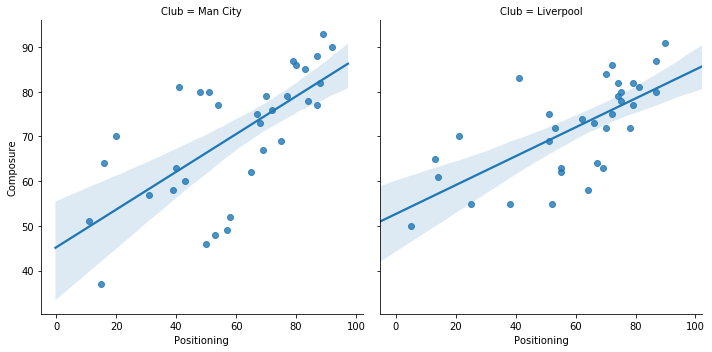

In [35]:
sns.lmplot(x='Positioning',y='Composure',data=df,col='Club')

### Composure median

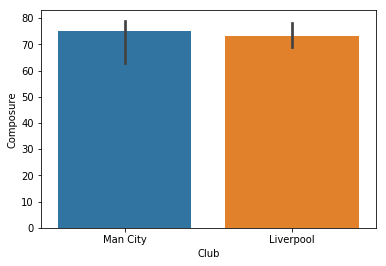

In [36]:
sns.barplot(x='Club', y= 'Composure',data=df,estimator=np.median)

### Univariate Analysis of Positioning

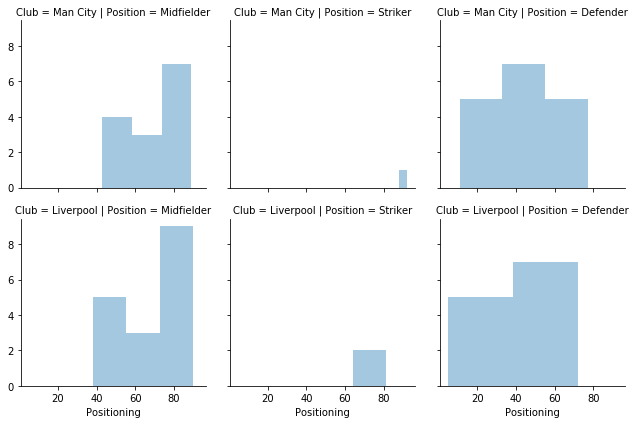

In [37]:
g=sns.FacetGrid(data=df,col='Position',row='Club')
g.map(sns.distplot,'Positioning',kde=False)

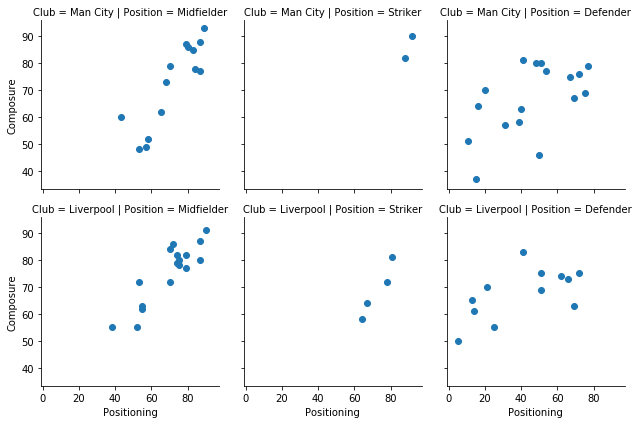

In [38]:
g=sns.FacetGrid(data=df,col='Position',row='Club')
g.map(plt.scatter,'Positioning','Composure')

In [39]:
df['Composure'].corr(df['Positioning'])

0.6784310146265757

### Conclusion : Playing Attribute
#### Playing attribute viz. Composure and Positioning is roughly same for both the teams. There is not much difference between in the distribution of the two attributes under study.
